In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 크롤링
from bs4 import BeautifulSoup
from selenium import webdriver
import time, sys

# 시각화 맵
import folium

# Label encoder
from sklearn.preprocessing import LabelEncoder

# dtclf
from sklearn.tree import DecisionTreeClassifier
finan_dtclf = DecisionTreeClassifier()
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Binarizer

from sklearn.tree import export_graphviz
import graphviz

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [2]:
df_train = pd.read_csv('./breast-cancer/train.csv')

In [4]:
df_train.columns
# Id : ID
# clump_thickness : 암세포의 두께 *
# uniformity_of_cell_size : 균일성 세포 크기
# uniformity_of_cell_shape : 세포모양의 균일성
# marginal_adhesion : 한계 유착
# single_epithelial_cell_size : 단일 상피 세포의 크기
# bare_nuclei : 핵
# bland_chromatin : 특징없는 염색질
# normal_nucleoli : 정상 핵분열 *
# mitosis : 체세포 분열
# class : 2는 양성 2개, 4는 악성 4개

Index(['Id', 'clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')

In [159]:
#  * Train Data
df_train = pd.read_csv('./breast-cancer/train.csv')
# 결측치 없음.V

# 불피요한 컬럼 제거(아직 컬럼의 의미 파악 못함)

# 문자형 데이터를 숫자형 데이터로 변환.V

# 목적 데이터 지정
X = df_train.drop(columns='class')
y = df_train['class']
# 학습, 테스트 비율 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# 학습
dtclf = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5)
dtclf.fit(X_train, y_train)



# * Test Data
df_test = pd.read_csv("./breast-cancer/test.csv")
# 결측치 없음

# 불피요한 컬럼 제거

# 문자형 데이터를 숫자형 데이터로 변환.V

In [160]:
# 암 예측
pred_result = dtclf.predict(df_test)
df_test['class'] = pred_result


# 파일 저장
tit = pd.read_csv('./breast-cancer/test.csv')
tit.drop(list(tit.columns)[1:], axis = 1, inplace=True)
tit['class'] = df_test['class']
tit.set_index('Id', inplace=True)
tit.to_csv('tit_test.csv')

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

def get_clf_eval(y_test, pred) :
#     print("-" * 5)
#     print("오차 행렬\n",confusion_matrix(y_test, pred))
#     print("정확도 : %.2f" %accuracy_score(y_test, pred))
#     print("정밀도 : %.2f" %precision_score(y_test, pred))
#     print("재현율 : %.2f" %recall_score(y_test, pred))
#     print("f1 Score : %.2f" %f1_score(y_test, pred))
#     print("AUC : %.2f" % roc_auc_score(y_test, pred))
#     print("-" * 5)
    return accuracy_score(y_test, pred), precision_score(y_test, pred),recall_score(y_test, pred), f1_score(y_test, pred), roc_auc_score(y_test, pred) 

from sklearn.metrics import f1_score
def get_eval_by_threshold(y_test, pred_proba):
    ts_accuracy = []
    ts_precision = []
    ts_recall = []
    ts_datas = {}
    f1_list = []
    auc_list= []
    for custom_threshold in range(1, 11) :
        tt_binarizer = Binarizer(threshold=custom_threshold * 0.1)
        custom_predict = tt_binarizer.fit_transform(pred_proba)[:, 1]
        accuracy  = accuracy_score(y_test, custom_predict)
        recall    = recall_score(y_test, custom_predict)
        precision = precision_score(y_test, custom_predict)
        f1 = f1_score(y_test, custom_predict)
        auc = roc_auc_score(y_test, custom_predict)
        
        ts_accuracy.append(accuracy)
        ts_precision.append(precision)
        ts_recall.append(recall)
        f1_list.append(f1)
        auc_list.append(auc)
        
    ts_datas['thresholds'] = [i * 0.1 for i in thresholds]
    ts_datas['accuracy'] = ts_accuracy
    ts_datas['precision'] = ts_precision
    ts_datas['recall'] = ts_recall
    ts_datas['f1_score'] = f1_list
    ts_datas['auc'] = auc_list
    
    plt.figure(figsize=(14, 5))
    pd.DataFrame(ts_datas).set_index('thresholds').plot()
    plt.style.use('seaborn-whitegrid')

    plt.show()

In [155]:
dtclf = DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01)
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1008x360 with 0 Axes>

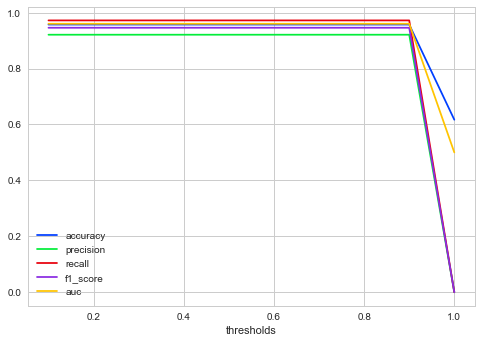

In [156]:
#  * Train Data
df_train = pd.read_csv('./breast-cancer/train.csv')
df_train.loc[df_train['class'] == 2, 'class'] = 0
df_train.loc[df_train['class'] == 4, 'class'] = 1

X = df_train.drop(columns='class')
y = df_train['class']
# 학습, 테스트 비율 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

dtclf = DecisionTreeClassifier() # option : max_depth=4, ccp_alpha=0.01
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba)

In [57]:
from sklearn.metrics import accuracy_score
dt_pred = dtclf.predict(X_test)
accuracy_score(y_test, dt_pred)
print('DecisionTree 정확도: %.2f' % accuracy_score(y_test, dt_pred))
# DecisionTree 정확도: 0.81

print('DecisionTree 정확도: %.2f' % dtclf.score(X_test, y_test))
# DecisionTree 정확도: 0.81

DecisionTree 정확도: 0.98
DecisionTree 정확도: 0.98


3
임곗값 배열의 index: [0 1 2]
전체 임곗값: [2. 1. 0.]
전체 임곗값별 FPR: [0.    0.052 1.   ]
전체 임곗값별 TPR: [0.    0.972 1.   ]


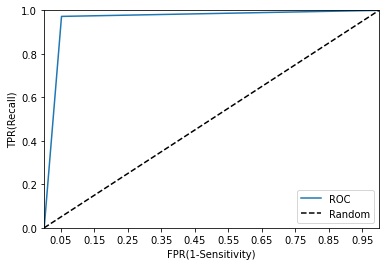

In [84]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_prob_class1 = dtclf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_prob_class1)
print(thresholds.shape[0])

# 반환된 임곗값 배열 로우가 47건 추출
thr_index = np.arange(0, thresholds.shape[0])
print('임곗값 배열의 index:', thr_index)
print('전체 임곗값:', np.round(thresholds[thr_index], 2))

# 추출된 임곗값에 따른 FPR, TPR 값
print('전체 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('전체 임곗값별 TPR:', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_prob_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_prob_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y측 명 설정 등
    start, end = plt.xlim();
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
roc_curve_plot(y_test, pred_proba[:,1])